In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [15]:
lr = 0.001
epochs = 50
opt = Adam(lr=lr, decay=lr / (50 * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/50
981/981 [==============================] - 8s 8ms/step - loss: 0.3450 - accuracy: 0.9009 - val_loss: 0.0823 - val_accuracy: 0.9773
Epoch 2/50
981/981 [==============================] - 7s 7ms/step - loss: 0.2590 - accuracy: 0.9257 - val_loss: 0.0539 - val_accuracy: 0.9852
Epoch 3/50
981/981 [==============================] - 7s 8ms/step - loss: 0.2310 - accuracy: 0.9339 - val_loss: 0.0566 - val_accuracy: 0.9843
Epoch 4/50
981/981 [==============================] - 7s 7ms/step - loss: 0.2042 - accuracy: 0.9430 - val_loss: 0.0486 - val_accuracy: 0.9872
Epoch 5/50
981/981 [==============================] - 7s 8ms/step - loss: 0.1790 - accuracy: 0.9495 - val_loss: 0.0434 - val_accuracy: 0.9871
Epoch 6/50
981/981 [==============================] - 7s 8ms/step - loss: 0.1534 - accuracy: 0.9563 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 7/50
981/981 [==============================] - 7s 7ms/step - loss: 0.1490 - accuracy: 0.9585 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 

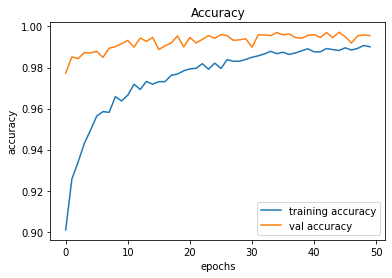

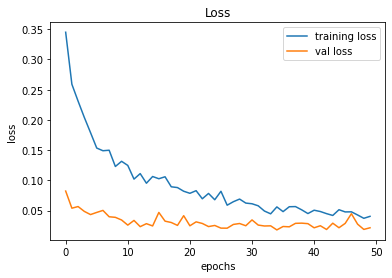

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[16  1 38 ... 32  7 10]


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,classes_x))
model.save("ninetyfive.h5")

0.9475851148060174
